# EastWestAirlines dataset 

## DBScan Clustering 

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import sklearn

In [118]:
airlines = pd.read_csv("EastWestAirlines.csv")
airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [119]:
values = airlines.iloc[:,1:]

###  Normalizing the data 

In [120]:
norm = MinMaxScaler()
norm_data = pd.DataFrame(norm.fit_transform(airlines.iloc[:,1:]))
norm_data

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


###   DBScan clustering model

In [121]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan.fit(norm_data) 

DBSCAN(eps=0.8)

In [122]:
cluster_labels = dbscan.labels_
cluster_labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [123]:
new_value = pd.DataFrame(dbscan.labels_,columns=['cluster']) 

In [124]:
airlines = pd.concat([airlines,new_value],axis=1) 
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [125]:
airlines.iloc[:,1:12].groupby(airlines.cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
0,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
1,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0


###     Visualization 

Text(0.5, 1.0, 'Clusters using DBScan')

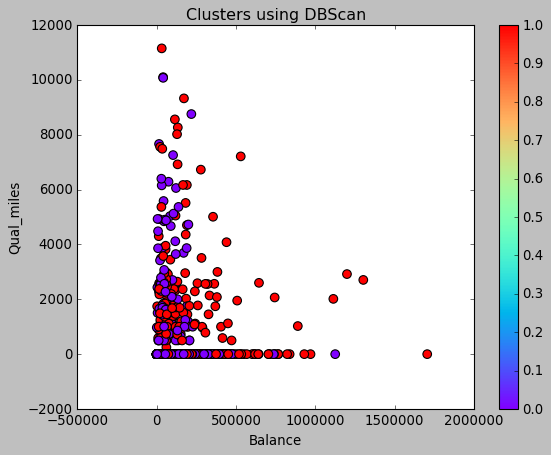

In [133]:
airlines.plot(x="Balance",y ="Qual_miles",c=dbscan.labels_ ,kind="scatter",s=60 ,cmap="rainbow") 
plt.title('Clusters using DBScan')   

Text(0.5, 1.0, 'Clusters using DBScan')

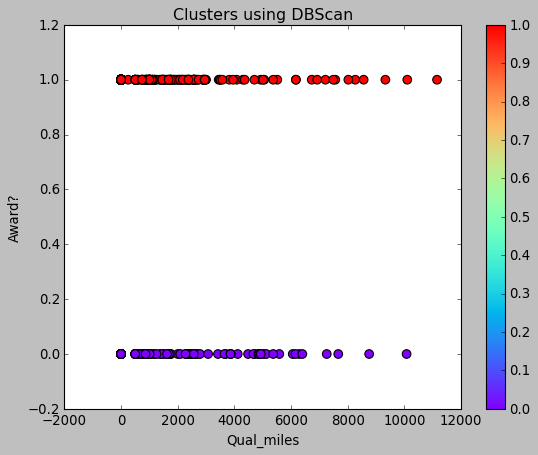

In [132]:
airlines.plot(x="Qual_miles",y ="Award?",c=dbscan.labels_ ,kind="scatter",s=60 ,cmap="rainbow") 
plt.title('Clusters using DBScan')   

In [112]:
sklearn.metrics.silhouette_score(data, cluster_labels) 

0.535930510919477

##  Inference 

###  Passengers in Cluster 0 also have less number of flight transaction in the past 12 months and they have less number of miles counted as topflight so they are not eligible for both awards and topflights 

###  Passengers in Cluster 1 have higher numbe of miles required for both award and topflight moreover they have high flight transaction in the past 12 months with high  bonus transaction also 

###  As the Balance and Qual_miles increases along with flight transaction the passengers get the accsess for Award and topflight